In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
df = pd.read_csv("data/air cargo supplychain.csv")

In [13]:
# Analyzing the impact of each factor on Delay Status

# Count of delays by Mode of Transport
mode_transport_delay = df.groupby("Mode of Transport")["Delay Status"].value_counts(normalize=True).unstack()

# Count of delays by Carrier Name
carrier_delay = df.groupby("Carrier Name")["Delay Status"].value_counts(normalize=True).unstack()

# Count of delays by Weather Conditions
weather_delay = df.groupby("Weather Conditions")["Delay Status"].value_counts(normalize=True).unstack()

# Count of delays by Day of Week
day_delay = df.groupby("Day of Week")["Delay Status"].value_counts(normalize=True).unstack()

print("Insight: \n",mode_transport_delay,"\n", carrier_delay,"\n", weather_delay,"\n", day_delay)

Insight: 
 Delay Status        Delayed   On-Time
Mode of Transport                    
Air                0.499321  0.500679
Rail               0.483305  0.516695
Truck              0.498033  0.501967 
 Delay Status      Delayed   On-Time
Carrier Name                       
DHL              0.502771  0.497229
Emirates Cargo   0.500000  0.500000
FedEx            0.496101  0.503899
Lufthansa Cargo  0.492913  0.507087
UPS              0.491979  0.508021 
 Delay Status         Delayed   On-Time
Weather Conditions                    
Clear               0.498498  0.501502
Foggy               0.483101  0.516899
Rainy               0.496289  0.503711
Stormy              0.501018  0.498982 
 Delay Status   Delayed   On-Time
Day of Week                     
Friday        0.499471  0.500529
Monday        0.491632  0.508368
Saturday      0.502002  0.497998
Sunday        0.486977  0.513023
Thursday      0.481752  0.518248
Tuesday       0.509078  0.490922
Wednesday     0.506740  0.493260


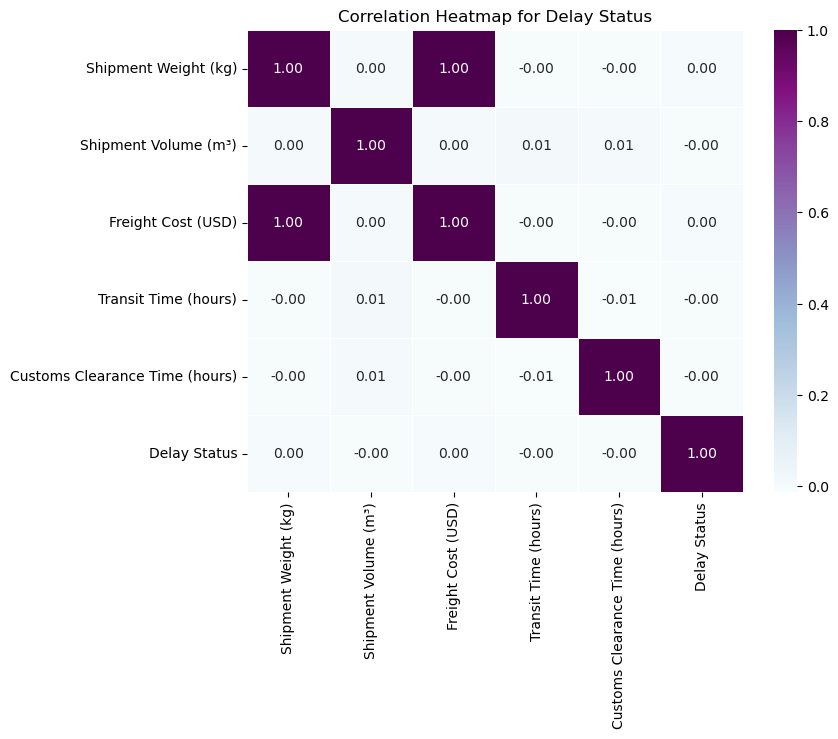

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "data/air cargo supplychain.csv"
df = pd.read_csv(file_path)

# Convert Delay Status to numerical (1 for Delayed, 0 for On-Time)
df["Delay Status"] = df["Delay Status"].map({"Delayed": 1, "On-Time": 0})

# Selecting only numerical columns for correlation
numerical_cols = ["Shipment Weight (kg)", "Shipment Volume (m³)", "Freight Cost (USD)",
                  "Transit Time (hours)", "Customs Clearance Time (hours)", "Delay Status"]

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="BuPu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Delay Status")
plt.show()

In [2]:
df = df.drop(columns="Shipment ID")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)

X = df.drop(columns=["Delay Status_On-Time"])
y = df["Delay Status_On-Time"]

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(C=2.5)

log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

log_reg_acc = accuracy_score(y_test, y_pred_log)
log_reg_acc

0.49966666666666665

In [4]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

dt_clf_acc = accuracy_score(y_test, y_pred_dt)

dt_clf_acc

0.489

In [5]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

rf_clf_acc = accuracy_score(y_test, y_pred_rf)
rf_clf_acc

0.49233333333333335

In [6]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

xb_clf = XGBClassifier()
xb_clf.fit(X_train, y_train)
y_pred_xb = xb_clf.predict(X_test)

xb_clf_acc = accuracy_score(y_test, y_pred_xb)
xb_clf_acc

0.5008333333333334

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

mlr_reg = LinearRegression()

mlr_reg.fit(X_train, y_train)
y_pred_mlr = mlr_reg.predict(X_test)

r2 = r2_score(y_test, y_pred_mlr)

print("R-squared Score:", r2)

R-squared Score: 1.0
